# Regresión por mínimos cuadrados
La toma de datos durante una experimentación o durante un análisis se ve siempre afectada por los $**errores** que puedan existir debido a **variables que no podemos controlar** y de las cuales $desconocemos su comportamiento. Los datos resultantes podrían presentar **errores inerentes al $fenómeno** que estudiamos y por lo tanto no siguen **la tendencia** que se esperaría. Es por ello que, en lugar de utilizar una interpolación entre los puntos, se requiere de **una aproximación** $b$ajo una tendencia que esté de acuerdo al modelo matemático que describa el fenómeno observado.$$

## Regresión lineal
A uno de los **métodos** para ajusta el modelo aproximado a los datos obtenidos se le conoce como **regresión por mínimos cuadrados**. El ejemplo mas sencillo se da cuando queremos ajustar la tendencia de una linea recta a un conjunto de datos, en este caso al método se le conoce como **regresión lineal**. 
Supongmos que queremos ajustar una linea recta a los puntos $(x_0,y_0),\,(x_1,y_1),\,...\,,\,(x_n,y_n)$ en un fenómeno donde mediomos una variable  y controlamos una variable . La expresión que mejor describe una tendencia lineal es de la forma 
$$y=a_0+a_1\,x+e$$
 donde $a_0$ y $a_1$ son la ordenada al origen y la pendiende, respectivamente; y  es la diferencia entre el modelo lineal y el conjunto de datos. También se puede entender como la diferencia del valor real con el valor aproximado por la recta. Es decri, para conjunto de datos de la forma $(x_i,y_i)$, estará asociado un error $e_i$ que será la diferencia para "alcanzar" el punto sobre una recta que contiene a todos los puntos promedio de la froma $(\hat{x},\hat{y})$.

<center>
    <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/raw/498db9030cf94ace36e12014acb45b41873494b9/Clases/Imagenes/Linear-regression.png" width="300">
</center>

De las diferentes formas de estimar este error, existe una a partir de la cual podemos obtener una única recta para ese conjunto de datos, y se basa en considerar la suma del cuadrado de todos los errores,
$$S_r=\sum_{i=1}^ne_i^2=\sum_{i=1}^n(y_i-\hat{y_i})^2=\sum_{i=1}^n(y_i-a_0-a_1x_i)^2$$
para que de esta forma, las distancias entre las mediciones  y el modelo lineal , puedan ser minimizada.
Debido a que buscamos una única recta cuya distancia sea mínima a todos los puntos, la ecuación antenrior se minimiza con respecto a los coeficientes $a_0$ y $a_1$, es decir, las derivadas parciales con respecto a estas variables deben ser cero. De estas derivadas se obtiene un sistema de dos ecuaciones a partir de las cuales se obtienen los valores para cada constante.
$$\frac{\partial S_r}{\partial a_0}=\sum y_i-\sum a_0-\sum a_1x_i=0$$
$$\frac{\partial S_r}{\partial a_1}=\sum y_ix_i-\sum a_0x_i-\sum a_1x_i^2=0$$
de donde 
$$a_0=\bar{y}-a_1\bar{x}$$
$$a_1=\frac{n\sum x_iy_i-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2}$$


Usando la función de ajuste de regresión lineal

Ecuación de la recta: y = 0.0714 + 0.8393x
Coeficiente a (intercept): 0.0714
Coeficiente b (pendiente): 0.8393
Coeficiente de determinación R²: 0.8683
Predicción para x=8: y = 6.7857


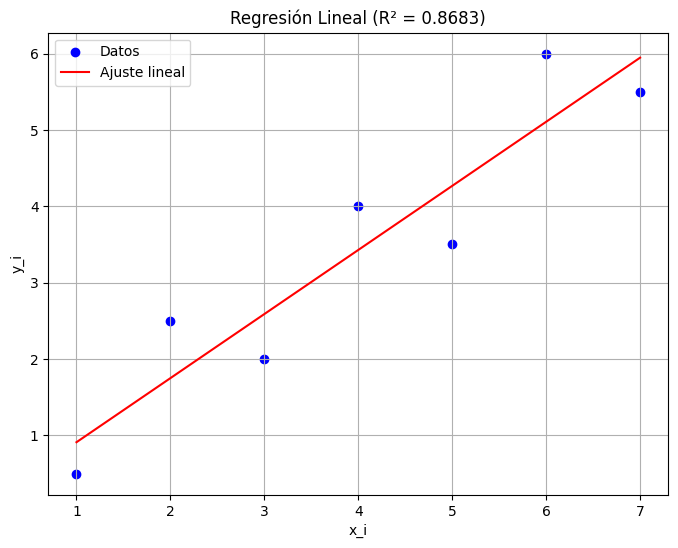

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
x_lineal = np.array([1, 2, 3, 4, 5, 6, 7])
y_lineal = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

# Cálculo de las sumas necesarias
n = len(x_lineal)
sum_x = np.sum(x_lineal)
sum_y = np.sum(y_lineal)
sum_xy = np.sum(x_lineal * y_lineal)
sum_x2 = np.sum(x_lineal ** 2)

# Cálculo de los coeficientes
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
a = (sum_y - b * sum_x) / n

# Predicciones
y_pred = a + b * x_lineal

# Cálculo del coeficiente de determinación R²
SS_res = np.sum((y_lineal - y_pred)**2)  # Suma de cuadrados de los residuos
SS_tot = np.sum((y_lineal - np.mean(y_lineal))**2)  # Suma de cuadrados total
R2 = 1 - (SS_res / SS_tot)  # Coeficiente de determinación

# Mostrar resultados
print(f'Ecuación de la recta: y = {a:.4f} + {b:.4f}x')
print(f'Coeficiente a (intercept): {a:.4f}')
print(f'Coeficiente b (pendiente): {b:.4f}')
print(f'Coeficiente de determinación R²: {R2:.4f}')

# Predicción para x=8 como ejemplo
x_pred = 8
y_pred = a + b * x_pred
print(f'Predicción para x={x_pred}: y = {y_pred:.4f}')

# Gráfico de los datos y la recta de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x_lineal, y_lineal, c='blue', label='Datos')  # Diagrama de dispersión
plt.plot(x_lineal, a + b*x_lineal, 'r', label='Ajuste lineal')  # Línea de regresión
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.title(f'Regresión Lineal (R² = {R2:.4f})')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

En virtud de que la linea recta representa una media para todos los valores alrededro de ella, la desviación estandar de esta acumulación de puntos alerededor de la recta se obtiene de 
$$s=\sqrt{\frac{S_r}{n-2}}$$
el error estandar para los datos usados sin considerar las estimaciones de los coeficientes  y  debido a que estos corresponde a dos de los  puntos usados en la estimación.

De la misma forma como se considera un valor medio con una desviación estándar para obtener una distribución sobre una estadística gaussiana, es posible obtener un coeficiente que nos nos de información de que tan grande es la diferencia entre los puntos del ajuste y la dispersión para cada uno de los datos con respecto al ajuste. A este parámetro se le conoce como coeficiente de determinación. 

## Linealización
En ocasiones, encontraremos que los datos no siguen una tendencia lineal por lo que tendremos que modificarlos para que puedan visualizarse como una línea recta.

Ecuación linealizada: log10(y) = -0.3002 + 1.7517*x
Pendiente (b): 1.7517
Intercepto (a): -0.3002
Coeficiente de determinación R²: 1.0000


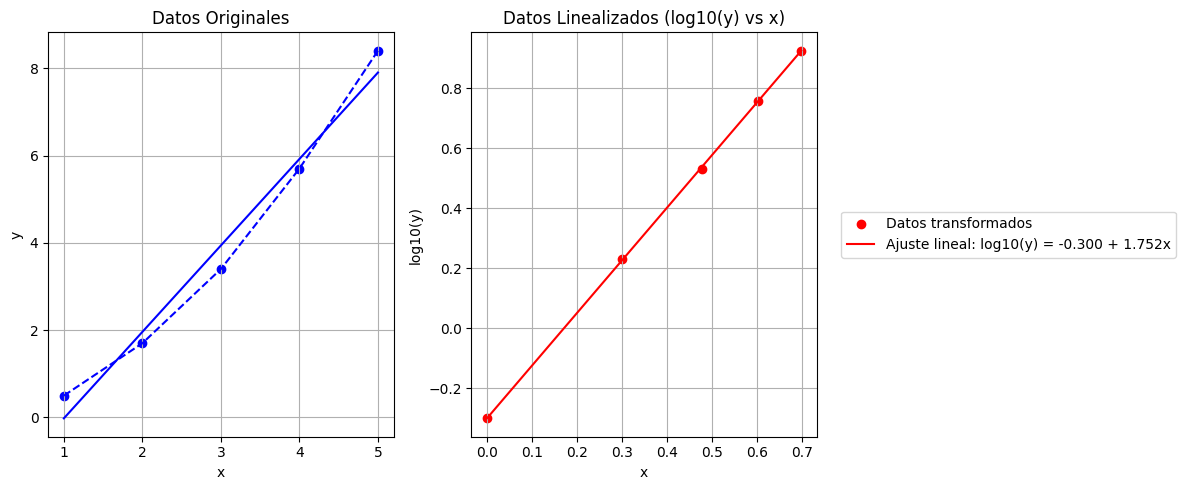

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos de la tabla
x_lineal = np.array([1, 2, 3, 4, 5])
y_lineal = np.array([0.5, 1.7, 3.4, 5.7, 8.4])

# Aplicar transformación logarítmica base 10 a y
x_log = np.log10(x_lineal)
y_log = np.log10(y_lineal)

# 1. Ajuste lineal a los datos NO transformados
result_lineal = linregress(x_lineal, y_lineal)
b_lineal, a_lineal = result_lineal.slope, result_lineal.intercept

# 2. Ajuste lineal a los datos transformados
result_log = linregress(x_log, y_log)
a, b = result_log.intercept, result_log.slope

# Crear figura con dos subgráficas
plt.figure(figsize=(12, 5))

# Subgráfica 1: Datos originales
plt.subplot(1, 2, 1)
plt.scatter(x_lineal, y_lineal, c='b', label='Datos crudos')
plt.plot(x_lineal, a_lineal + b_lineal*x_lineal, 'b-', linewidth=1.5)
plt.plot(x_lineal, y_lineal, 'b--')
plt.title('Datos Originales')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Subgráfica 2: Datos transformados y ajuste lineal
plt.subplot(1, 2, 2)
plt.scatter(x_log, y_log, c='r', label='Datos transformados')
plt.plot(x_log, a + b*x_log, 'r-', linewidth=1.5, 
         label=f'Ajuste lineal: log10(y) = {a:.3f} + {b:.3f}x')
plt.title('Datos Linealizados (log10(y) vs x)')
plt.xlabel('x')
plt.ylabel('log10(y)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Mostrar ecuación de ajuste en consola
print(f'Ecuación linealizada: log10(y) = {a:.4f} + {b:.4f}*x')
print(f'Pendiente (b): {b:.4f}')
print(f'Intercepto (a): {a:.4f}')

# Calcular R²
y_log_pred = a + b*x_log
SS_res = np.sum((y_log - y_log_pred)**2)
SS_tot = np.sum((y_log - np.mean(y_log))**2)
R2 = 1 - (SS_res / SS_tot)
print(f'Coeficiente de determinación R²: {R2:.4f}')

# Añadir distribución gaussiana sobre la línea (como en tu ejemplo anterior)
# (Esta parte no estaba en el código MATLAB original pero la mencionaste)
plt.tight_layout()
plt.show()

## Ajuste polinamial
En el caso de que la linealzación no sea la manera mas adecuada para transformar los datos, un ajuste polinomal sería lo mas adecuado. El numero de ecuaciones necesarias para minimizar el orden el error dependerá del grado del polinómino de tal forma que si el modelo tiene una forma
$$y=a_0+a_1x+a_2x^2+...+a_mx^m+e$$
entonces se necesitarían  ecuaciones provenientes de las derivadas $\frac{\partial S_r}{\partial a_0},...\,,\frac{\partial S_r}{\partial a_m}$. Este problema está resuelto con la función polifit. 

# Ejercicio
De los datos proporcionados, calcula la aceleración y desaceleración promedio del metro entre dos estaciones.

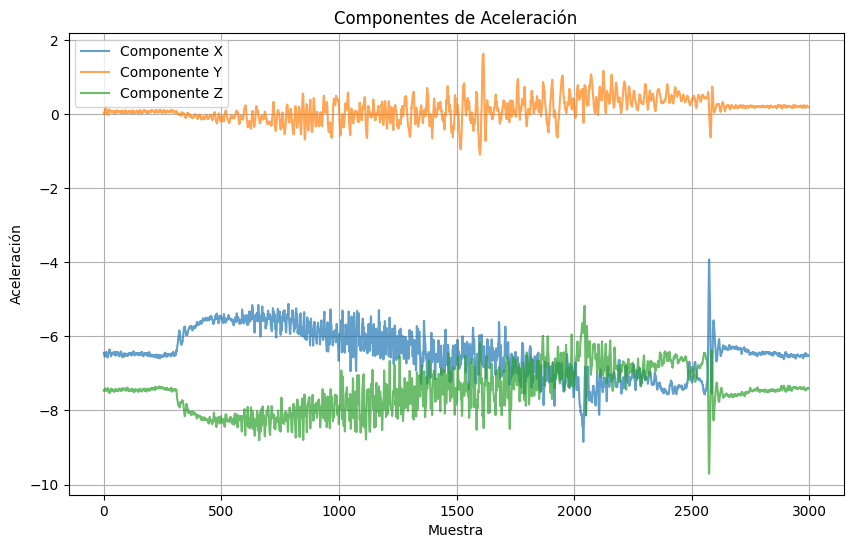

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# URL del archivo en GitHub
url = "https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/717fb51a62058a2968f76f8eea982ab7080e4252/Clases/aceleracion.dat"

# Descargar el contenido del archivo (usando el enlace raw)
raw_url = "https://raw.githubusercontent.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/717fb51a62058a2968f76f8eea982ab7080e4252/Clases/aceleracion.dat"
response = requests.get(raw_url)
data = response.text

# Leer los datos con numpy
# Usamos StringIO para simular un archivo en memoria
x, y, z = np.loadtxt(StringIO(data), unpack=True)

# Ahora puedes graficar las componentes
plt.figure(figsize=(10, 6))

plt.plot(x, label='Componente X', alpha=0.7)
plt.plot(y, label='Componente Y', alpha=0.7)
plt.plot(z, label='Componente Z', alpha=0.7)

plt.title('Componentes de Aceleración')
plt.xlabel('Muestra')
plt.ylabel('Aceleración')
plt.legend()
plt.grid(True)
plt.show()